## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import r2_score
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

## Data Cleaning

In [4]:
# Checking unique values for all the Object type columns
for i in list(data.columns.values):
    if(data[i].dtype == np.object):
        print(data[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [5]:
# Missing values percentage in each column
dict(round(100*(data.isnull().sum(axis=0)/len(data.index)),2))

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 17.74,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 93.77,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.55,
 'MasVnrArea': 0.55,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.53,
 'BsmtCond': 2.53,
 'BsmtExposure': 2.6,
 'BsmtFinType1': 2.53,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.07,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': 0.0,


In [6]:
#Removing Columns with null values for more than 10% null values
columns = data.loc[:,(round(100*(data.isnull().sum(axis=0)/len(data.index)),2)>85).values].columns
print("Columns with null values percentage more than 85%:",columns)
data = data.drop(columns,axis=1)

Columns with null values percentage more than 85%: Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')


In [7]:
# Dropping columns unnecessary for our prediction
data.drop(['Id'],axis=1,inplace=True)

In [8]:
#Removing Columns with null values since null values are very low in number
columns = data.loc[:,(round(100*(data.isnull().sum(axis=0)/len(data.index)),2)>0).values].columns
print("Columns with null values:",columns)

Columns with null values: Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence'],
      dtype='object')


In [9]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [10]:
# Assigning all 'nan' values to 'NA' in all columns
data['MasVnrType'] = data['MasVnrType'].apply(lambda x: 'NA' if str(x) == 'nan' else x)
median = data['LotFrontage'].describe()['50%']
data['LotFrontage'] = data['LotFrontage'].apply(lambda x: median if str(x) == 'nan' else x)
median = data['MasVnrArea'].describe()['50%']
data['MasVnrArea'] = data['MasVnrArea'].apply(lambda x: median if str(x) == 'nan' else x)
data['BsmtQual'] = data['BsmtQual'].apply(lambda x: 'NA' if str(x) == 'nan' else x)
data['BsmtCond'] = data['BsmtCond'].apply(lambda x: 'NA' if str(x) == 'nan' else x)  
data['BsmtExposure'] = data['BsmtExposure'].apply(lambda x: 'NA' if str(x) == 'nan' else x)  
data['BsmtFinType1'] = data['BsmtFinType1'].apply(lambda x: 'NA' if str(x) == 'nan' else x)  
data['BsmtFinType2'] = data['BsmtFinType2'].apply(lambda x: 'NA' if str(x) == 'nan' else x) 
data['Electrical'] = data['Electrical'].apply(lambda x: 'NA' if str(x) == 'nan' else x)  
data['FireplaceQu'] = data['FireplaceQu'].apply(lambda x: 'NA' if str(x) == 'nan' else x) 
data['GarageType'] = data['GarageType'].apply(lambda x: 'NA' if str(x) == 'nan' else x) 
median = data['GarageYrBlt'].describe()['50%']
data['GarageYrBlt'] = data['GarageYrBlt'].apply(lambda x: median if str(x) == 'nan' else x)
data['GarageFinish'] = data['GarageFinish'].apply(lambda x: 'NA' if str(x) == 'nan' else x) 
data['GarageQual'] = data['GarageQual'].apply(lambda x: 'NA' if str(x) == 'nan' else x) 
data['GarageCond'] = data['GarageCond'].apply(lambda x: 'NA' if str(x) == 'nan' else x)  
data['Fence'] = data['Fence'].apply(lambda x: 'NA' if str(x) == 'nan' else x) 
    

In [11]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [12]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NA,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,4,2010,WD,Normal,142125


We can see that only 3 columns have been removed, and all the other missing values have been replaced by their median

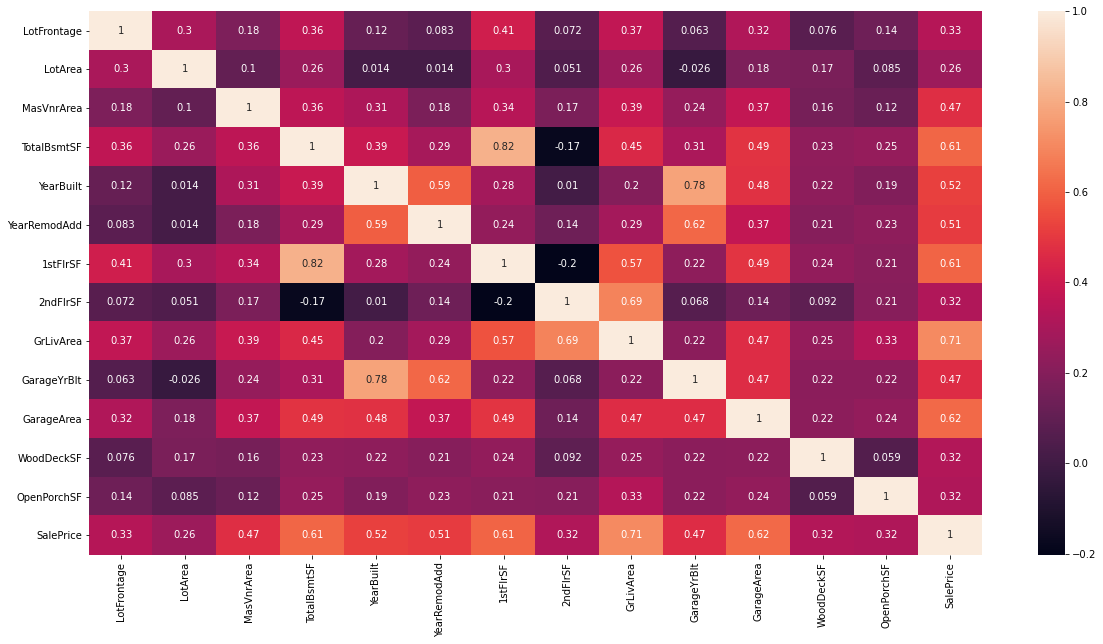

In [13]:
corr=data[['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','YearBuilt','YearRemodAdd',
             '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']].corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr,annot=True)
plt.show()

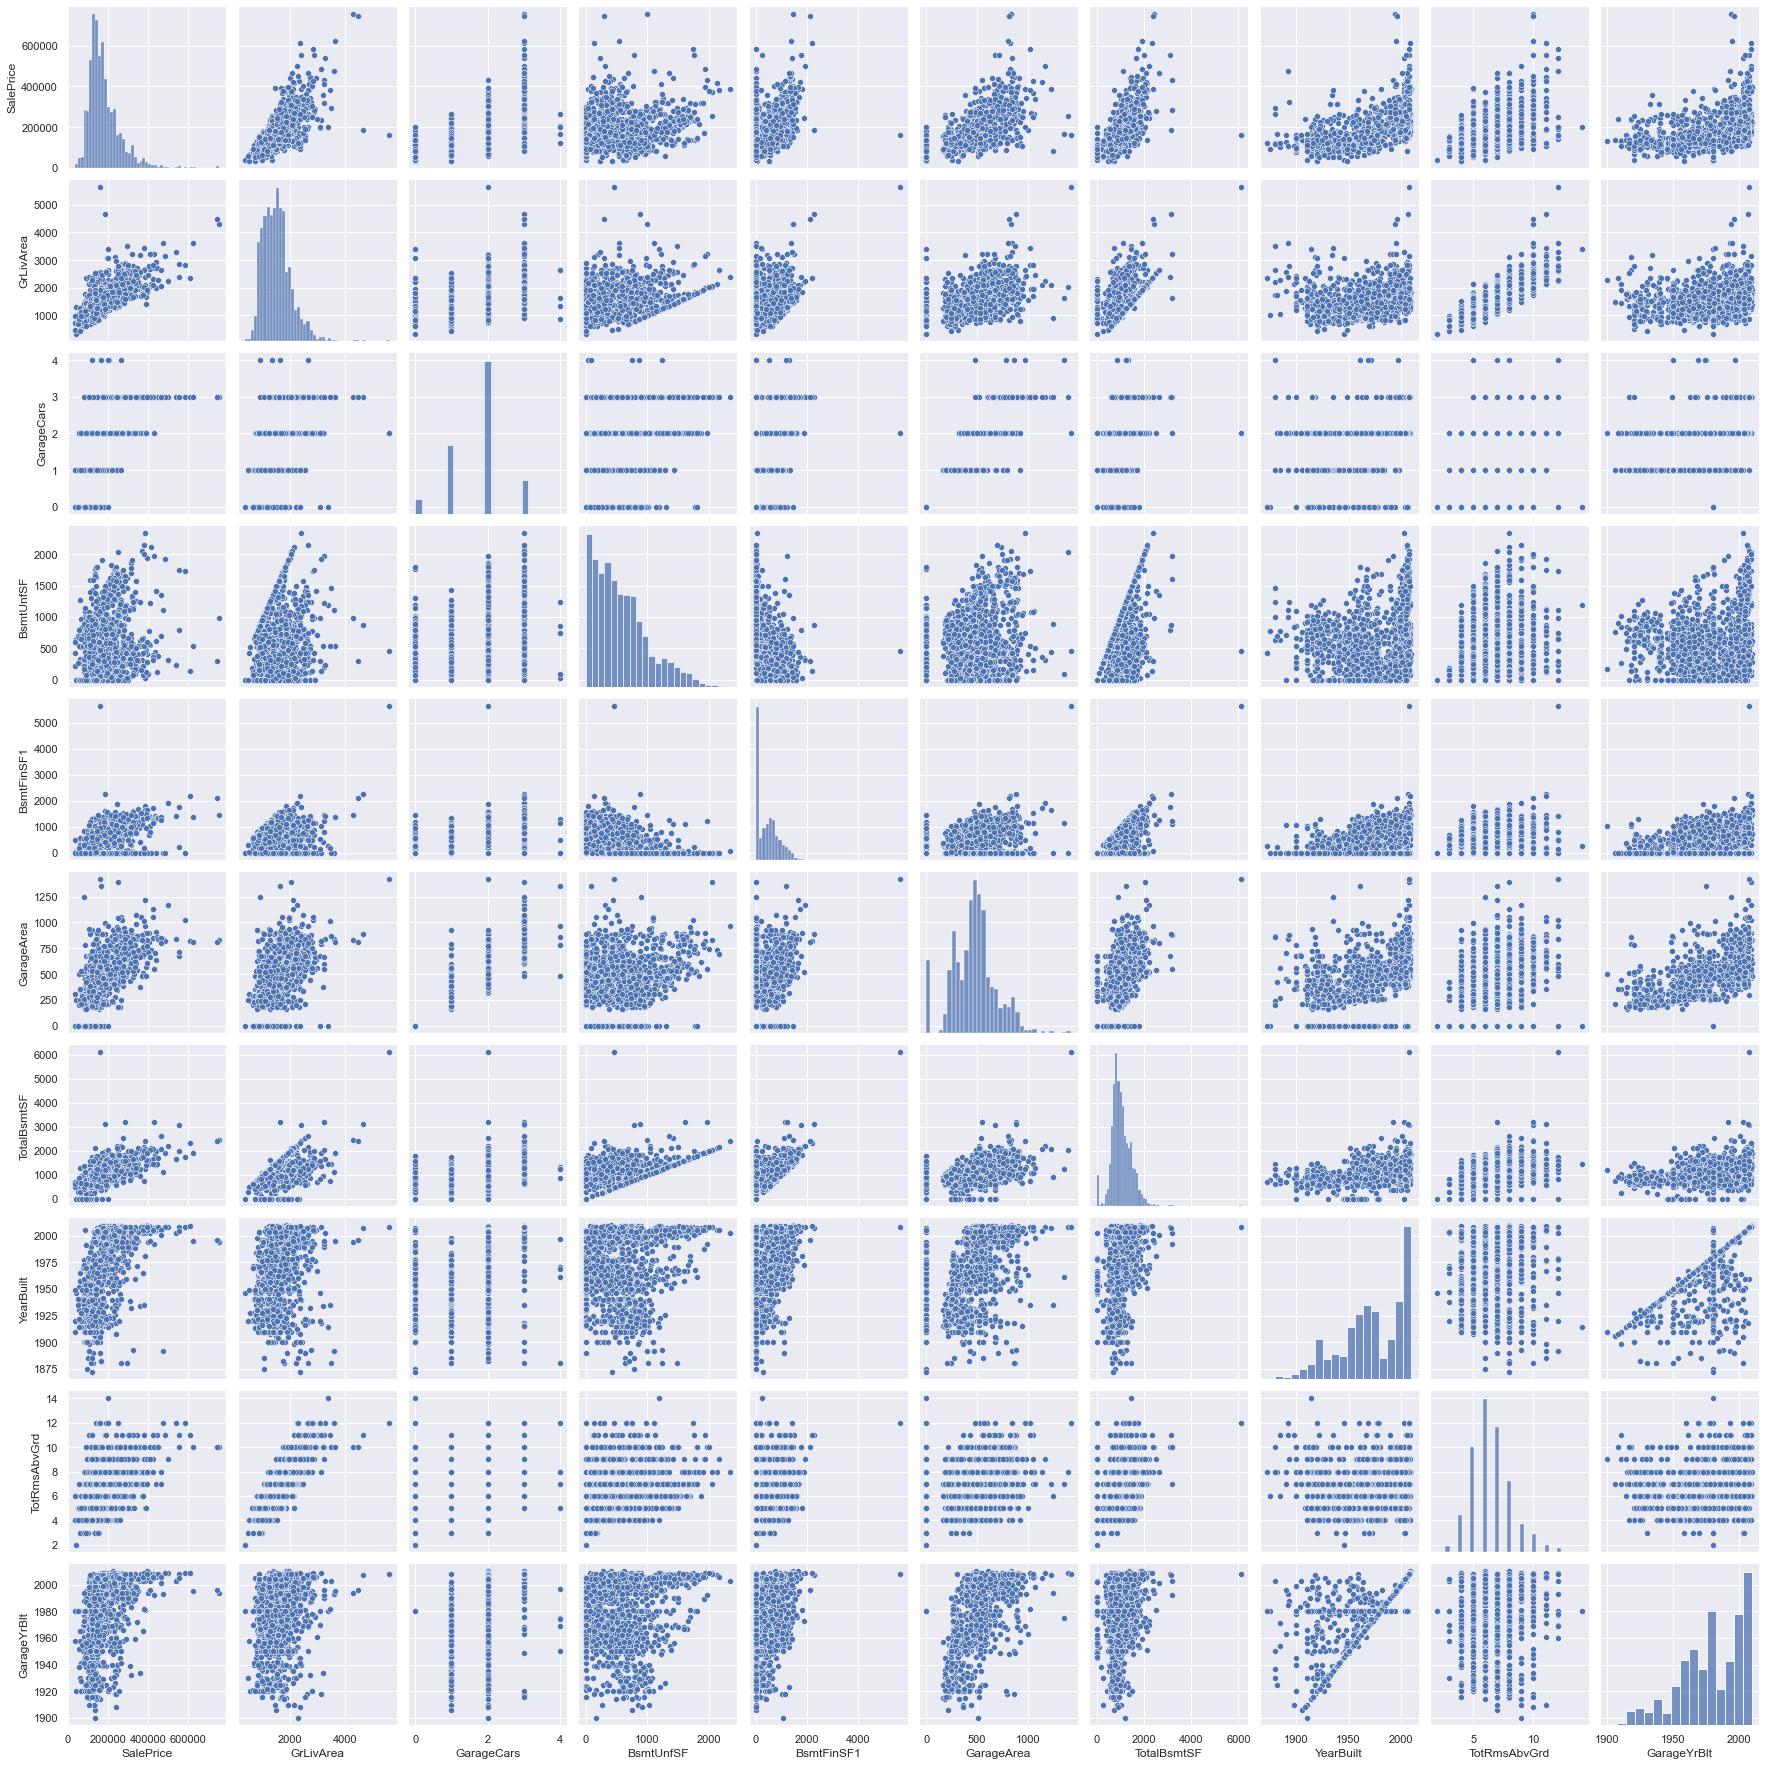

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

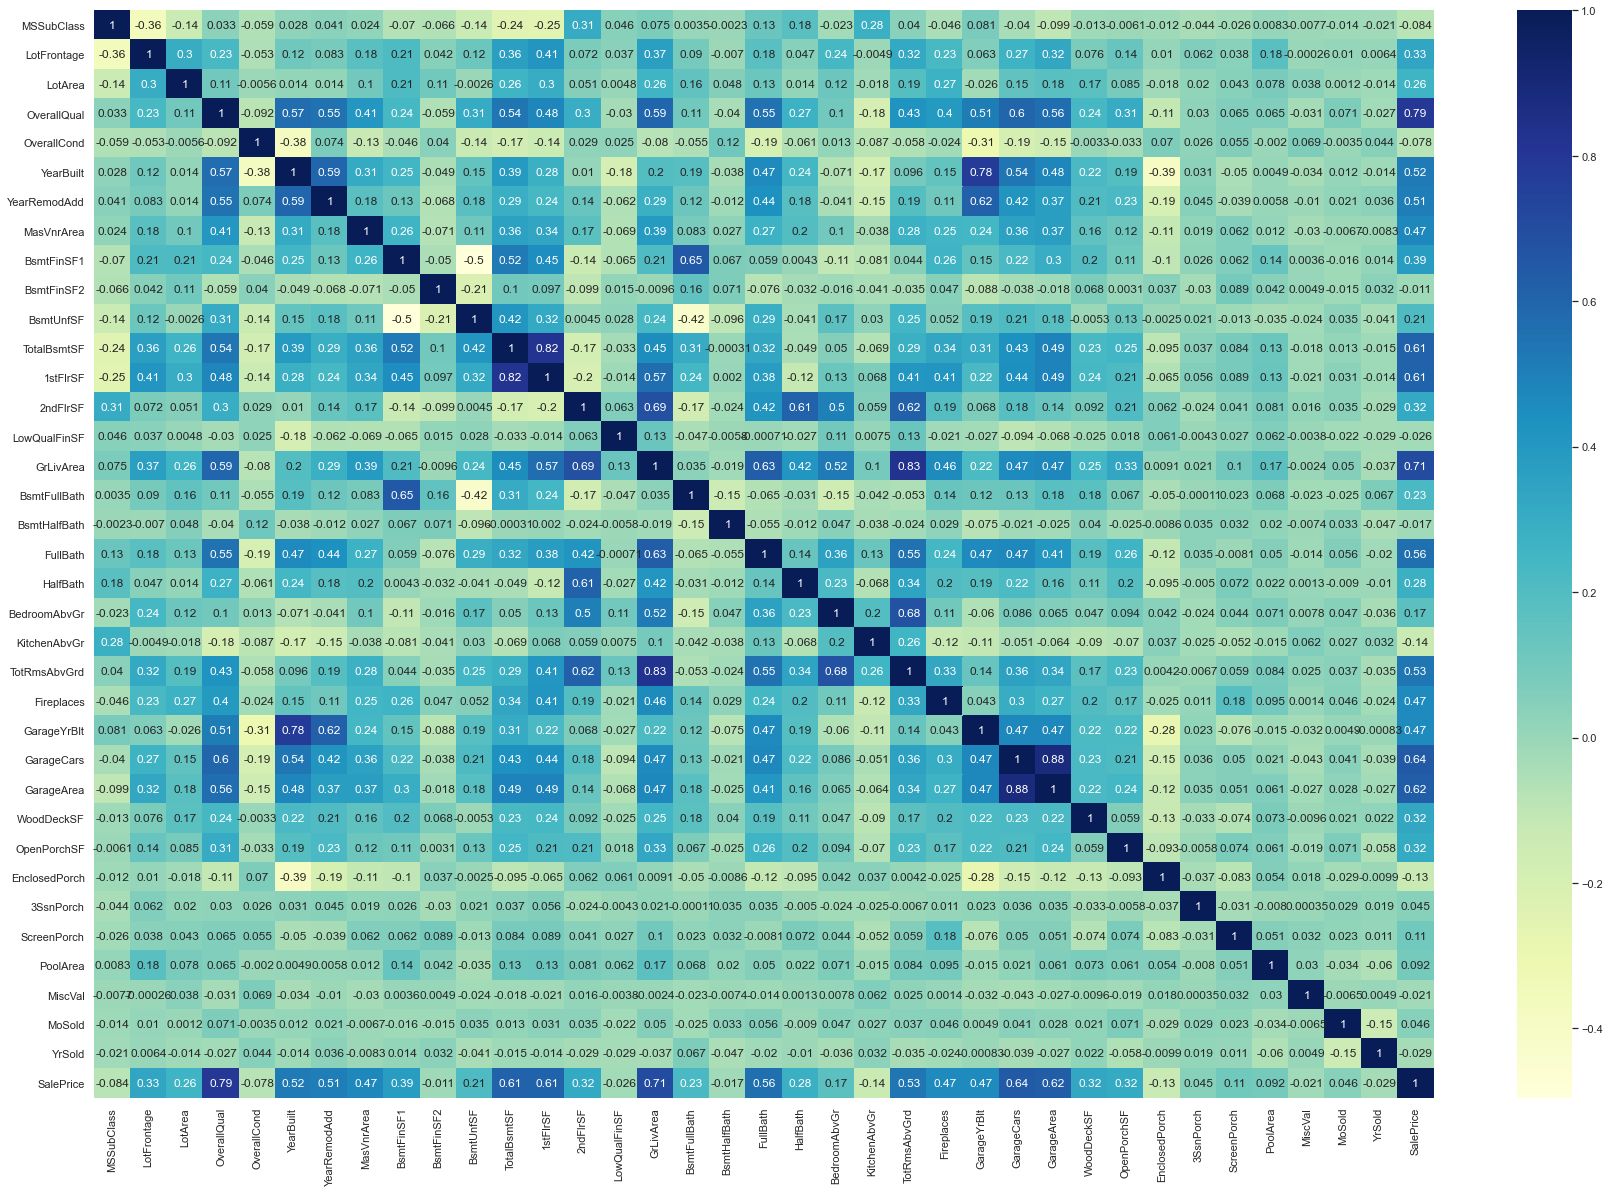

In [15]:
# Checking Correlation for complete data
plt.figure(figsize=(30,20))
cor = data.corr()
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [16]:
# Dropping columns one by one which has higher correlation and which will not effect Sale price
data = data.drop(columns=['GarageCars','TotRmsAbvGrd'])

In [17]:
# Creating columns 'huse_age' and 'remodel_age'
data['House_age'] = data['YrSold']-data['YearBuilt']
data['Remodel_age'] = data['YrSold']-data['YearRemodAdd']
data[['YearBuilt','YrSold','House_age','YearRemodAdd','Remodel_age']]

,YearBuilt,YrSold,House_age,YearRemodAdd,Remodel_age
0,2003,2008,5,2003,5
1,1976,2007,31,1976,31
2,2001,2008,7,2002,6
3,1915,2006,91,1970,36
4,2000,2008,8,2000,8
...,...,...,...,...,...
1455,1999,2007,8,2000,7
1456,1978,2010,32,1988,22
1457,1941,2010,69,2006,4
1458,1950,2010,60,1996,14


In [18]:
data.drop(['YearBuilt','YearRemodAdd'],1,inplace=True)

### Outlier Treatment

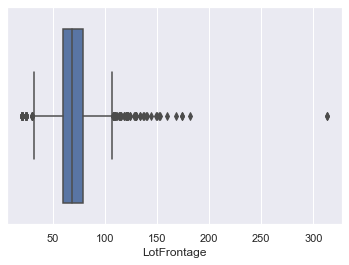

In [19]:
sns.boxplot(data['LotFrontage'])
data = data[data['LotFrontage']<160]


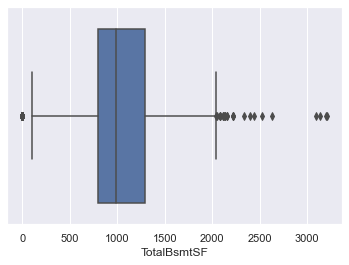

In [20]:
sns.boxplot(data['TotalBsmtSF'])
data = data[data['TotalBsmtSF']<3000]

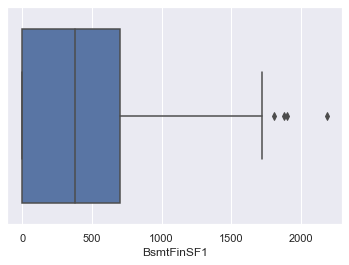

In [21]:
sns.boxplot(data['BsmtFinSF1'])
data = data[data['BsmtFinSF1']<2100]

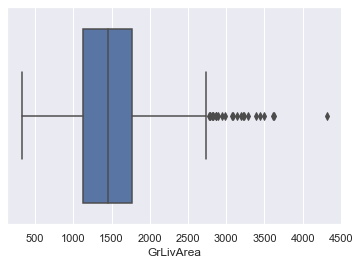

In [22]:
sns.boxplot(data['GrLivArea'])
data = data[data['GrLivArea']<4000]

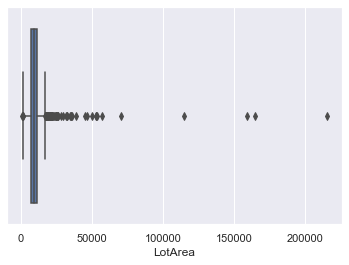

In [23]:
sns.boxplot(data['LotArea'])
data = data[data['LotArea']<70000]

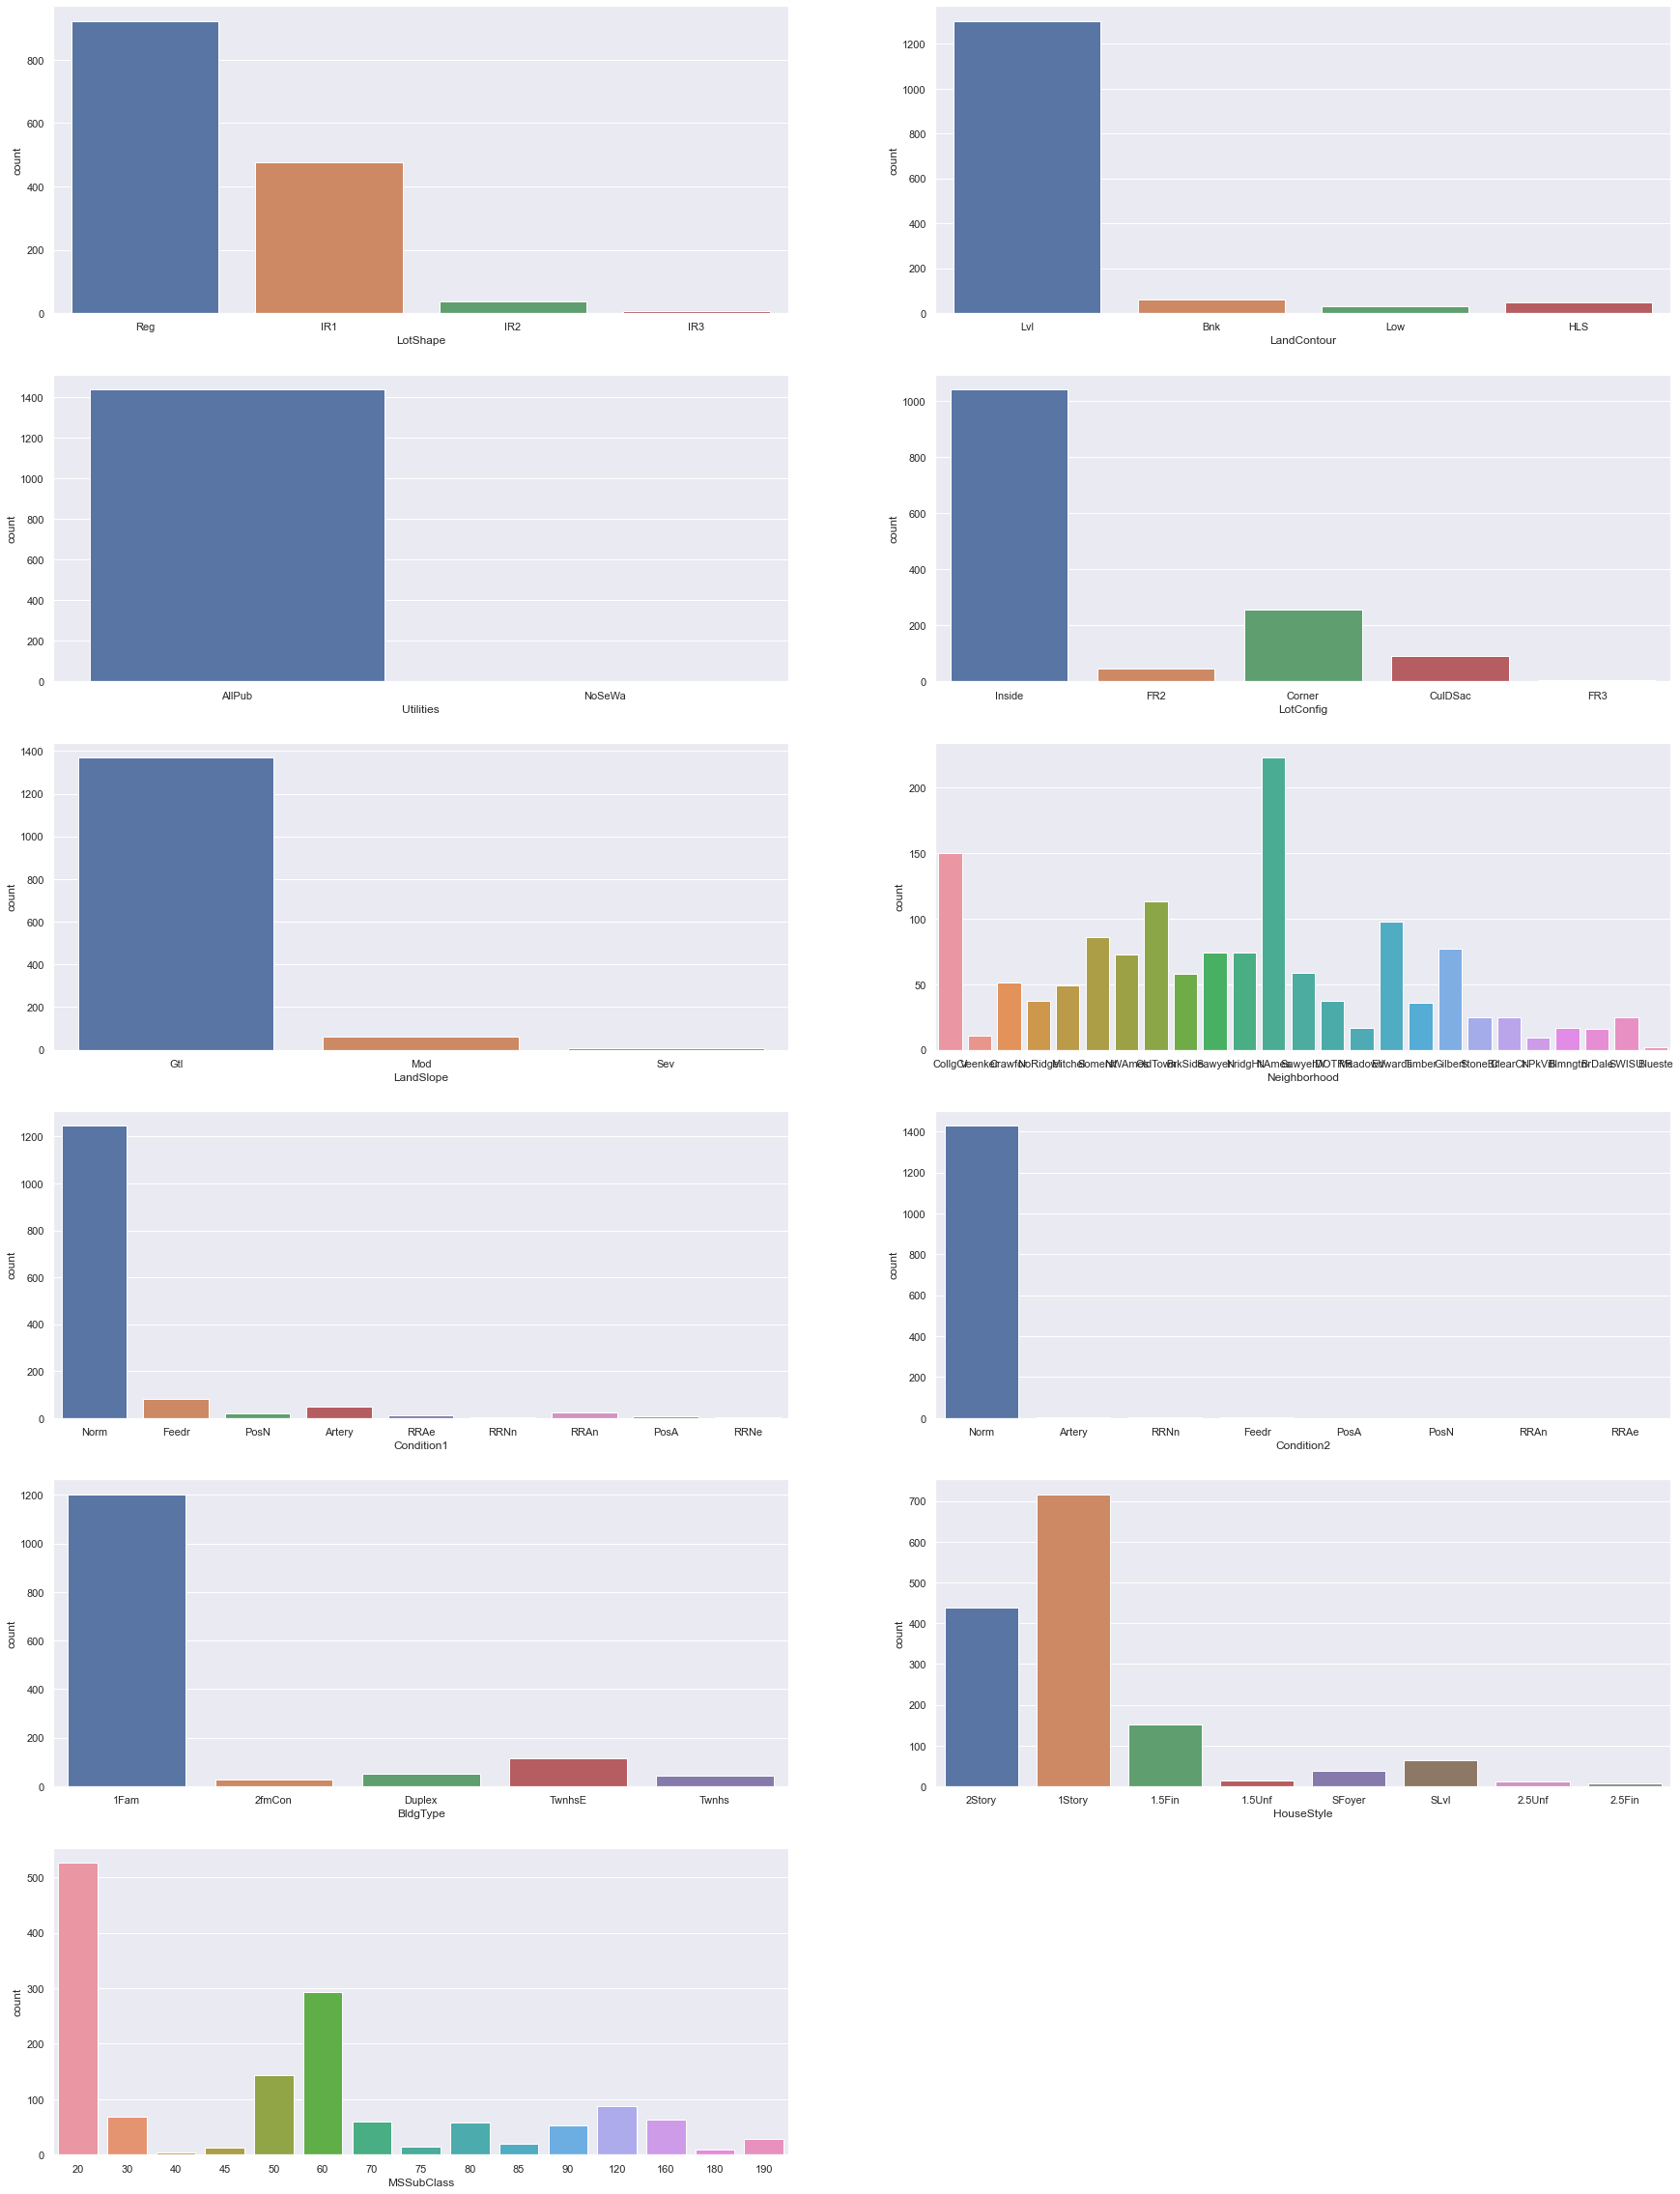

In [24]:
category = ['LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','MSSubClass']

# Visualising Categorical Data
plt.figure(figsize=(30, 90))
i = 0
for colName in category :
    plt.subplot(13,2,i+1)
    sns.countplot(x = colName, data = data)
    i+=1
plt.show()

### As we can see, most of the columns are highly skewed data. Thus, dropping columns with highly skewed data.
### Column 'MSSubClass' is giving same information as 'HouseStyle'

In [25]:
data.drop(columns=['Utilities','LandSlope','Condition2','MSSubClass'],inplace=True)

## Creating Dummies for Categorical Data

In [26]:
num_numeric_cols = data._get_numeric_data().columns
num_cat_cols = list(set(data.columns) - set(num_numeric_cols))
num_cat_cols

['MasVnrType',
 'Exterior2nd',
 'Fence',
 'LotShape',
 'RoofMatl',
 'HouseStyle',
 'GarageCond',
 'PavedDrive',
 'Condition1',
 'Exterior1st',
 'FireplaceQu',
 'Street',
 'BsmtFinType2',
 'Functional',
 'GarageFinish',
 'BldgType',
 'KitchenQual',
 'MSZoning',
 'BsmtFinType1',
 'SaleType',
 'LotConfig',
 'RoofStyle',
 'SaleCondition',
 'Foundation',
 'ExterQual',
 'LandContour',
 'CentralAir',
 'ExterCond',
 'HeatingQC',
 'Neighborhood',
 'Electrical',
 'BsmtCond',
 'BsmtQual',
 'BsmtExposure',
 'GarageQual',
 'Heating',
 'GarageType']

In [27]:
data['Functional'].value_counts()

Typ     1342
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [28]:
# Combining smaller categories with lower value counts as 'Others' category
data['Functional'] = data['Functional'].map({'Typ':'Typ','Min2':'Min2','Min1':'Min1','Mod':'Mod','Maj1':'Maj1','Maj2':'Others','Sev':'Others'})
data['GarageCond'] = data['GarageCond'].map({'TA':'TA','NA':'NA','Fa':'Fa','Gd':'Others','Po':'Others','Ex':'Others'})
data['SaleType'] = data['SaleType'].map({'WD':'WD','New':'New','COD':'COD','ConLD':'Others','ConLw':'Others','ConLI':'Others','CWD':'Others','Oth':'Others','Con':'Others'})
data['HeatingQC'] = data['HeatingQC'].map({'Ex':'Ex','TA':'TA','Gd':'Gd','Fa':'Others','Po':'Others'})
data['Electrical'] = data['Electrical'].map({'SBrkr':'SBrkr','FuseA':'FuseA','FuseF':'FuseF','FuseP':'Others','Mix':'Others','NA':'Others'})
data['Condition1'] = data['Condition1'].map({'Norm':'Norm','Feedr':'Feedr','PosN':'Others','RRNn':'Others','Artery':'Artery','PosA':'Others','RRAe':'Others','RRAn':'RRAn'})
data['Exterior2nd'] = data['Exterior2nd'].map({'VinylSd':'VinylSd','MetalSd':'MetalSd','HdBoard':'HdBoard','Wd Sdng':'Wd Sdng','Plywood':'Plywood','CmentBd':'CmentBd','Wd Shng':'Wd Shng','Stucco':'Stucco','BrkFace':'BrkFace','AsbShng':'Others','ImStucc':'Others','Brk Cmn':'Others','Stone':'Others','AsphShn':'Others','CBlock':'Others','Other':'Others'})
data['MSZoning'] = data['MSZoning'].map({'RL':'RL','RM':'RM','FV':'FV','RH':'Others','C (all)':'Others'})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'Unf':'Unf','Rec':'Rec','LwQ':'LwQ','NA':'NA','BLQ':'Others','ALQ':'Others','GLQ':'Others'})
data['HouseStyle'] = data['HouseStyle'].map({'1Story':'1Story','2Story':'2Story','1.5Fin':'1.5Fin','SLvl':'SLvl','SFoyer':'Others','1.5Unf':'Others','2.5Unf':'Others','2.5Fin':'Others'})
data['Foundation'] = data['Foundation'].map({'PConc':'PConc','CBlock':'CBlock','BrkTil':'BrkTil','Slab':'Others','Stone':'Others','Wood':'Others'})
data['SaleCondition'] = data['SaleCondition'].map({'Normal':'Normal','Partial':'Partial','Abnorml':'Abnorml','Family':'Others','Alloca':'Others','AdjLand':'Others'})
data['RoofStyle'] = data['RoofStyle'].map({'Gable':'Gable','Hip':'Hip','Flat':'Others','Gambrel':'Others','Mansard':'Others','Shed':'Others'})
data['MasVnrType'] = data['MasVnrType'].map({'None':'None','BrkFace':'BrkFace','Stone':'Stone','BrkCmn':'Others','NA':'Others'})
data['GarageQual'] = data['GarageQual'].map({'TA':'TA','NA':'NA','Fa':'Fa','Gd':'Others','Po':'Others','Ex':'Others'})
data['GarageType'] = data['GarageType'].map({'Attchd':'Attchd','Detchd':'Detchd','BuiltIn':'BuiltIn','NA':'NA','Basment':'Others','CarPort':'Others','2Types':'Others'})
data['Exterior1st'] = data['Exterior1st'].map({'VinylSd':'VinylSd','HdBoard':'HdBoard','MetalSd':'MetalSd','Wd Sdng':'Wd Sdng','Plywood':'Plywood','CemntBd':'CemntBd','BrkFace':'BrkFace','WdShing':'Others','Stucco':'Others','AsbShng':'Others','BrkComm':'Others','Stone':'Others','CBlock':'Others','AsphShn':'Others','ImStucc':'Others'})
data['RoofMatl'] = data['RoofMatl'].map({'CompShg':'CompShg','Tar&Grv':'Tar&Grv','WdShngl':'Others','ClyTile':'Others','Metal':'Others','Roll':'Others','Membran':'Others'})
data['FireplaceQu'] = data['FireplaceQu'].map({'NA':'NA','Ex':'Others','TA':'TA','Gd':'Gd','Fa':'Others','Po':'Others'})
data['BsmtCond'] = data['BsmtCond'].map({'NA':'Others','TA':'TA','Gd':'Gd','Fa':'Fa','Po':'Others'})
data['Heating'] = data['Heating'].map({'GasA':'GasA','GasW':'GasW','Grav':'Others','Wall':'Others','OthW':'Others','Floor':'Others'})


In [29]:
data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,House_age,Remodel_age
0,RL,65.0,8450,Pave,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,NA,0,2,2008,WD,Normal,208500,5,5
1,RL,80.0,9600,Pave,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,NA,0,5,2007,WD,Normal,181500,31,31
2,RL,68.0,11250,Pave,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,NA,0,9,2008,WD,Normal,223500,7,6
3,RL,60.0,9550,Pave,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,NA,0,2,2006,WD,Abnorml,140000,91,36
4,RL,84.0,14260,Pave,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,NA,0,12,2008,WD,Normal,250000,8,8


In [30]:
data = pd.get_dummies(data,drop_first=True,columns=num_cat_cols)

In [31]:
data.head() 

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtExposure_No,GarageQual_NA,GarageQual_Others,GarageQual_TA,Heating_GasW,Heating_Others,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,1,0,0,1,0,0,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,1,0,0,1,0,0,0,1,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,0,0


## Scaling Data

In [32]:
scaler=StandardScaler()
cols = data.columns
data = pd.DataFrame(scaler.fit_transform(data))
data.columns = cols
data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'BsmtExposure_No', 'GarageQual_NA', 'GarageQual_Others',
       'GarageQual_TA', 'Heating_GasW', 'Heating_Others', 'GarageType_BuiltIn',
       'GarageType_Detchd', 'GarageType_NA', 'GarageType_Others'],
      dtype='object', length=183)

In [33]:
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtExposure_No,GarageQual_NA,GarageQual_Others,GarageQual_TA,Heating_GasW,Heating_Others,GarageType_BuiltIn,GarageType_Detchd,GarageType_NA,GarageType_Others
0,-0.210294,-0.290087,0.677477,-0.518935,0.541396,0.647758,-0.285289,-0.944708,-0.468872,-0.816186,...,0.721871,-0.243957,-0.118595,0.339464,-0.109224,-0.099015,-0.251837,-0.604591,-0.243957,-0.155395
1,0.577352,-0.065923,-0.055398,2.169582,-0.572305,1.288355,-0.285289,-0.640637,0.549625,0.308183,...,-1.385290,-0.243957,-0.118595,0.339464,-0.109224,-0.099015,-0.251837,-0.604591,-0.243957,-0.155395
2,-0.052765,0.255703,0.677477,-0.518935,0.348203,0.129629,-0.285289,-0.300258,-0.308321,-0.638945,...,-1.385290,-0.243957,-0.118595,0.339464,-0.109224,-0.099015,-0.251837,-0.604591,-0.243957,-0.155395
3,-0.472842,-0.075669,0.677477,-0.518935,-0.572305,-0.506258,-0.285289,-0.059724,-0.719734,-0.525401,...,0.721871,-0.243957,-0.118595,0.339464,-0.109224,-0.099015,-0.251837,1.654011,-0.243957,-0.155395
4,0.787391,0.842426,1.410352,-0.518935,1.416447,0.527647,-0.285289,-0.173184,0.256117,-0.015835,...,-1.385290,-0.243957,-0.118595,0.339464,-0.109224,-0.099015,-0.251837,-0.604591,-0.243957,-0.155395


### Train-Test Split

In [34]:
y = data.pop('SalePrice')
X = data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [35]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Eliminating Correlations

#### RFE with Cross Validation

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1, 100))}]
model_cv = GridSearchCV(estimator=rfe,cv=folds,param_grid=hyper_params, return_train_score=True,verbose=1,scoring='r2',n_jobs=-1)
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 99 candidates, totalling 297 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:  2.4min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()), n_jobs=-1,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.836359,0.013345,0.009243,0.000982,1,{'n_features_to_select': 1},6.714124e-01,6.088430e-01,6.268537e-01,6.357030e-01,2.629914e-02,33,0.621432,0.655115,0.647546,0.641364,0.014429
1,1.692733,0.104279,0.014440,0.001790,2,{'n_features_to_select': 2},7.718162e-01,7.136944e-01,7.197700e-01,7.350935e-01,2.608506e-02,32,0.720712,0.727558,0.749520,0.732597,0.012289
2,1.603756,0.136580,0.022425,0.017728,3,{'n_features_to_select': 3},8.218137e-01,7.681396e-01,7.335346e-01,7.744960e-01,3.631899e-02,31,0.772243,0.786433,0.764654,0.774443,0.009026
3,1.733126,0.007478,0.009264,0.000504,4,{'n_features_to_select': 4},8.306792e-01,7.693505e-01,7.272088e-01,7.757462e-01,4.248298e-02,30,0.782193,0.805544,0.787487,0.791741,0.009996
4,1.826065,0.022645,0.008470,0.001865,5,{'n_features_to_select': 5},8.464768e-01,7.814897e-01,7.743080e-01,8.007582e-01,3.246061e-02,29,0.798688,0.812358,0.838529,0.816525,0.016530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.889331,0.589205,0.009152,0.000583,95,{'n_features_to_select': 95},-2.213879e+20,-7.423502e+22,-3.705521e+21,-2.605398e+22,3.409882e+22,96,0.934967,0.947118,0.946998,0.943028,0.005700
95,1.086243,0.030444,0.009760,0.001738,96,{'n_features_to_select': 96},-6.757142e+21,-2.772996e+20,-2.975113e+21,-3.336518e+21,2.657699e+21,73,0.935295,0.947256,0.947200,0.943250,0.005625
96,1.092065,0.002652,0.010581,0.001457,97,{'n_features_to_select': 97},-4.859359e+21,-9.307528e+17,-1.368845e+21,-2.076378e+21,2.045570e+21,66,0.935591,0.947445,0.947368,0.943468,0.005570
97,1.047196,0.009066,0.008803,0.000732,98,{'n_features_to_select': 98},-6.996412e+20,-1.383711e+21,-4.243584e+21,-2.108979e+21,1.535012e+21,67,0.936088,0.947619,0.947454,0.943720,0.005397


In [38]:
model_cv.best_params_['n_features_to_select']
model_cv.best_estimator_.n_features_

31

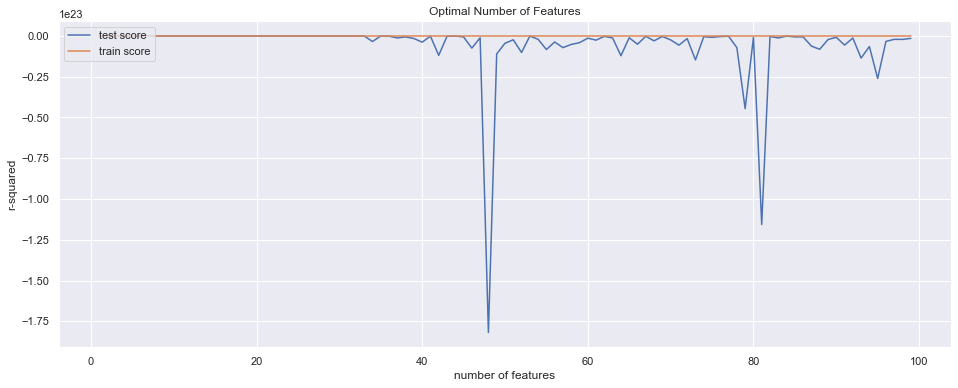

In [39]:
# Plotting CV results for the RFE
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [40]:
# final model
n_features_optimal = model_cv.best_params_['n_features_to_select']

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

-129404.39329674318


In [41]:
model_cv.score(X_test,y_test)

0.8989199178254865

## Ridge and Lasso Regression

In [42]:
ridge = Ridge()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
model_cv = GridSearchCV(estimator=ridge,cv=folds,param_grid=params, return_train_score=True,verbose=1,scoring='r2',n_jobs=-1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [43]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038387,0.021257,0.025554,0.027475,0.0001,{'alpha': 0.0001},0.911641,0.902234,0.882536,0.853978,...,0.887495,0.019740,26,0.941911,0.940770,0.945799,0.949201,0.945149,0.944566,0.002994
1,0.044900,0.027868,0.017228,0.007099,0.001,{'alpha': 0.001},0.911642,0.902234,0.882538,0.853987,...,0.887498,0.019737,25,0.941911,0.940770,0.945799,0.949201,0.945149,0.944566,0.002994
2,0.045860,0.015693,0.027840,0.024004,0.01,{'alpha': 0.01},0.911653,0.902235,0.882557,0.854078,...,0.887525,0.019708,24,0.941911,0.940770,0.945799,0.949201,0.945149,0.944566,0.002994
3,0.072262,0.025877,0.020643,0.013083,0.05,{'alpha': 0.05},0.911702,0.902238,0.882642,0.854478,...,0.887645,0.019581,23,0.941911,0.940770,0.945799,0.949201,0.945149,0.944566,0.002993
4,0.067785,0.048756,0.017627,0.011224,0.1,{'alpha': 0.1},0.911762,0.902243,0.882746,0.854961,...,0.887791,0.019427,22,0.941911,0.940770,0.945799,0.949200,0.945149,0.944566,0.002993
5,0.030109,0.012872,0.009171,0.001323,0.2,{'alpha': 0.2},0.911881,0.902251,0.882949,0.855881,...,0.888071,0.019136,21,0.941910,0.940769,0.945798,0.949195,0.945148,0.944564,0.002992
6,0.069298,0.080336,0.014770,0.007424,0.3,{'alpha': 0.3},0.911996,0.902260,0.883142,0.856740,...,0.888336,0.018866,20,0.941908,0.940769,0.945797,0.949189,0.945147,0.944562,0.002990
7,0.146283,0.099978,0.016234,0.008478,0.4,{'alpha': 0.4},0.912109,0.902269,0.883329,0.857546,...,0.888586,0.018614,19,0.941907,0.940768,0.945796,0.949181,0.945146,0.944559,0.002988
8,0.041170,0.025126,0.041312,0.049976,0.5,{'alpha': 0.5},0.912218,0.902277,0.883508,0.858303,...,0.888825,0.018380,18,0.941904,0.940767,0.945794,0.949171,0.945144,0.944556,0.002985
9,0.041859,0.031046,0.016541,0.006270,0.6,{'alpha': 0.6},0.912326,0.902285,0.883680,0.859015,...,0.889051,0.018161,17,0.941902,0.940765,0.945792,0.949159,0.945142,0.944552,0.002982


In [44]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Ridge(alpha=100)

 The best score across ALL searched params:
 0.8995433198845459

 The best parameters across ALL searched params:
 {'alpha': 100}


#### The best lambda for Ridge Regression is: 100 and mean test score is 89.95% and mean train score is 93.68%

In [45]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge_sp = Ridge(alpha=alpha)

ridge_sp.fit(X_train, y_train)
print(ridge_sp.coef_)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_sp.predict(X_train)
y_pred_test = ridge_sp.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

[[ 1.97874680e-02  8.42053752e-02  1.29189452e-01  6.98707207e-02
   2.92276039e-02  7.36082600e-02  1.06799294e-02  1.13082777e-02
   9.51913654e-02  1.06588464e-01  9.15906154e-02  2.62259694e-03
   1.58651767e-01  2.58173994e-02 -4.77902945e-03  4.72006173e-02
   2.18046265e-02 -1.53075329e-02 -4.20324882e-02  1.63383557e-02
   1.44996205e-02  7.07911826e-02  3.57739016e-02  3.13681721e-02
   1.72647580e-02  9.92987871e-03  2.41227994e-02  1.99317005e-02
  -5.22613301e-03 -3.84381566e-03 -6.43360978e-04 -5.25624838e-02
  -4.27149430e-02  4.84273443e-03  1.07522712e-03  1.53517685e-02
   1.68988609e-02 -2.06029872e-02 -4.53548775e-03 -1.19728227e-03
  -2.17725892e-02  1.03023138e-02 -1.46700731e-02  7.00655190e-03
  -6.13925359e-03  7.59515634e-03  9.01041427e-03  2.22857022e-03
   8.13667949e-03  1.45502068e-02 -1.52767132e-02  5.78995995e-03
   2.81706348e-02 -2.58161748e-02  3.73377188e-04  2.08807344e-02
   1.97536929e-03 -3.20807582e-03  2.76011379e-03 -4.31046771e-03
   9.22228

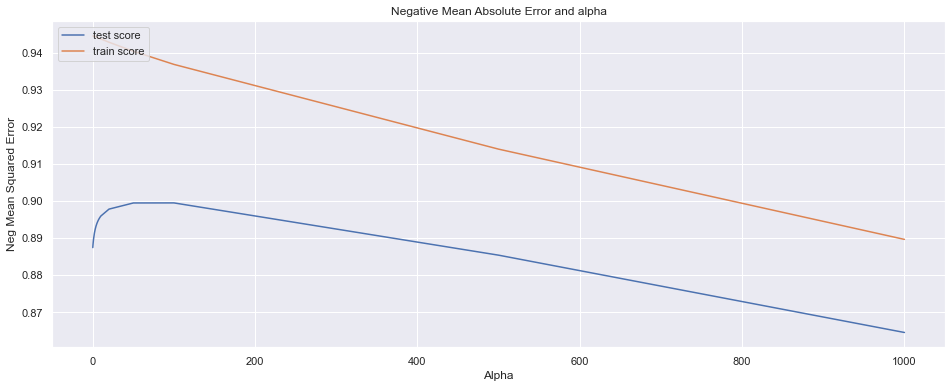

In [46]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('Alpha')
plt.ylabel('Neg Mean Squared Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['test score', 'train score'], loc='upper left')

In [47]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0 ]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
model_cv = GridSearchCV(estimator=lasso,cv=folds,param_grid=params, return_train_score=True,verbose=1,scoring='r2',n_jobs=-1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.290052,0.018400,0.008610,0.001027,0.0001,{'alpha': 0.0001},0.913012,0.903248,0.884530,0.857008,...,0.889325,0.019092,3,0.941885,0.940753,0.945765,0.949172,0.945127,0.944540,0.002990
1,0.159256,0.006427,0.012732,0.003010,0.001,{'alpha': 0.001},0.919986,0.906960,0.889753,0.873466,...,0.897339,0.015707,2,0.940602,0.939782,0.944698,0.947828,0.943914,0.943365,0.002914
2,0.040329,0.006401,0.010030,0.003632,0.01,{'alpha': 0.01},0.917793,0.903503,0.891435,0.888114,...,0.898857,0.010770,1,0.924887,0.925736,0.929896,0.931373,0.927437,0.927866,0.002450
3,0.024123,0.002658,0.011379,0.002224,0.05,{'alpha': 0.05},0.878461,0.883375,0.842736,0.872493,...,0.863300,0.018492,4,0.870822,0.876683,0.879930,0.881125,0.883789,0.878470,0.004453
4,0.022531,0.004489,0.009096,0.000638,0.1,{'alpha': 0.1},0.836477,0.857152,0.797076,0.854582,...,0.829725,0.025211,5,0.834184,0.833357,0.842687,0.842946,0.846604,0.839955,0.005243
5,0.023004,0.003618,0.008901,0.001829,0.2,{'alpha': 0.2},0.729976,0.774868,0.701157,0.788141,...,0.741087,0.034527,6,0.738475,0.734646,0.756519,0.750416,0.754495,0.746910,0.008760
6,0.020477,0.002073,0.008185,0.000925,0.3,{'alpha': 0.3},0.633134,0.675223,0.616824,0.702004,...,0.650988,0.032298,7,0.648769,0.633083,0.671370,0.657675,0.666378,0.655455,0.013585
7,0.016658,0.001822,0.009155,0.001060,0.4,{'alpha': 0.4},0.508669,0.544820,0.505785,0.586277,...,0.531457,0.030826,8,0.527146,0.505285,0.558021,0.542952,0.546588,0.535998,0.018260
8,0.018463,0.002874,0.009937,0.001220,0.5,{'alpha': 0.5},0.370029,0.389402,0.394597,0.450449,...,0.398819,0.027151,9,0.389987,0.357119,0.435093,0.411937,0.418349,0.402497,0.026902
9,0.016264,0.004025,0.011435,0.005155,0.6,{'alpha': 0.6},0.245402,0.233546,0.269230,0.299913,...,0.261894,0.022694,10,0.262872,0.214987,0.294521,0.269671,0.282642,0.264939,0.027241


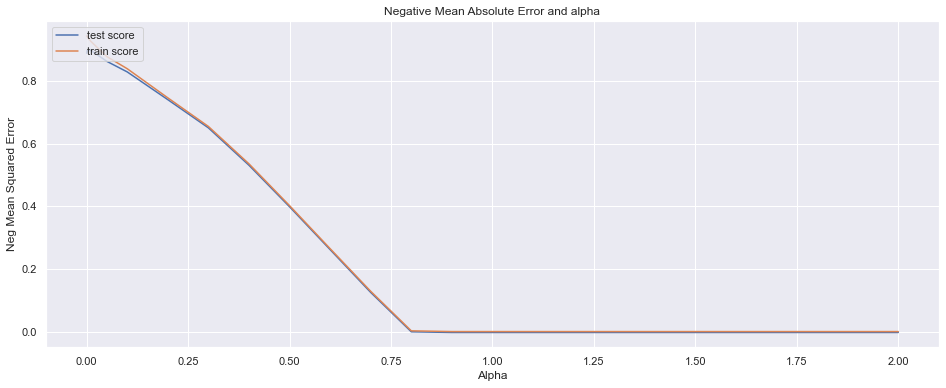

In [49]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('Alpha')
plt.ylabel('Neg Mean Squared Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['test score', 'train score'], loc='upper left')

In [50]:
print("\n The best estimator across ALL searched params:\n",
          model_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",
          model_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",
          model_cv.best_params_)


 The best estimator across ALL searched params:
 Lasso(alpha=0.01)

 The best score across ALL searched params:
 0.8988569837867175

 The best parameters across ALL searched params:
 {'alpha': 0.01}


#### The best lambda for Lasso regression is 0.01 and mean test score is 89.88% and mean train score is 92.78%

In [51]:
alpha_lasso =0.01

lasso_sp = Lasso(alpha=alpha_lasso)
        
lasso_sp.fit(X_train, y_train)

Lasso(alpha=0.01)

In [52]:
model_parameters = list(lasso_sp.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso_sp.coef_)
lasso_list = dict({'cols':list(cols),'model_parameters':model_parameters})

In [53]:
lasso_list

{'cols': ['constant',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'Fireplaces',
  'GarageYrBlt',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'House_age',
  'Remodel_age',
  'MasVnrType_None',
  'MasVnrType_Others',
  'MasVnrType_Stone',
  'Exterior2nd_CmentBd',
  'Exterior2nd_HdBoard',
  'Exterior2nd_MetalSd',
  'Exterior2nd_Others',
  'Exterior2nd_Plywood',
  'Exterior2nd_Stucco',
  'Exterior2nd_VinylSd',
  'Exterior2nd_Wd Sdng',
  'Exterior2nd_Wd Shng',
  'Fence_GdWo',
  'Fence_MnPrv',
  'Fence_MnWw',
  'Fence_NA',
  'LotShape_IR2',
  'LotShape_IR3',
  'LotShape_Reg',
  'RoofMatl_Others',
  'RoofMatl_Tar&Grv',
  'House

In [54]:
selected_params = {}
for i in range(len(lasso_list['model_parameters'])):
    if(lasso_list['model_parameters'][i]>0):
        selected_params[lasso_list['cols'][i]] = lasso_list['model_parameters'][i]

In [55]:
# Sorting effect of features on price in descending order
selected_params = sorted(selected_params.items(),key=(lambda kv:(kv[1], kv[0])),reverse=True)

In [56]:
selected_params[:27]

[('LowQualFinSF', 0.34132876164906845),
 ('LotArea', 0.18556613632196753),
 ('BsmtUnfSF', 0.10412010093790879),
 ('LotFrontage', 0.08822287090452402),
 ('MasVnrArea', 0.08084348916948011),
 ('Neighborhood_NoRidge', 0.07642468323567972),
 ('BsmtFinType1_Unf', 0.07337956574200878),
 ('Neighborhood_Somerst', 0.0717967657816219),
 ('GarageYrBlt', 0.06760641099307438),
 ('OverallQual', 0.06411147969544395),
 ('Neighborhood_CollgCr', 0.04795374162995078),
 ('BsmtQual_TA', 0.047849812427117056),
 ('Functional_Others', 0.03942721564486853),
 ('Heating_Others', 0.03727138738372581),
 ('Neighborhood_NWAmes', 0.028129710196953095),
 ('Neighborhood_SawyerW', 0.027945695568844735),
 ('GarageArea', 0.025576855964305943),
 ('BsmtFinType1_BLQ', 0.024821626200784576),
 ('MasVnrType_Stone', 0.024134045034953377),
 ('Condition1_Feedr', 0.021405802985150185),
 ('OverallCond', 0.019447693856604362),
 ('WoodDeckSF', 0.01752737397424437),
 ('Foundation_Others', 0.016664748738766635),
 ('RoofStyle_Others', 0.

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_sp.predict(X_train)
y_pred_test = lasso_sp.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.924520302544689
0.9043962953547721
1866490.109797037
360334.5773579531
0.0737931089585623
0.09995444713791625


In [58]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
#         'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.934785,9.245203e-01
1,R2 Score (Test),0.909560,9.043963e-01
2,RSS (Train),64.331185,1.866490e+06
3,RSS (Test),40.942782,3.603346e+05
4,MSE (Train),0.252502,2.716489e-01
5,MSE (Test),0.307500,3.161557e-01


### Top features for predicting the price and variables describing the price of a house are:
1. LowQualFinSF
2. LotArea
3. BsmtUnfSF
4. LotFrontage
5. MasVnrArea
6. Neighborhood_NoRidge

### The best lambda for Ridge regression is 100 and best lambda for Lasso regression is 0.01. 
### The Lasso Regression selected 48 features out of 182.

## Doubling the optimal value of Ridge and Lasso Regression

In [59]:
#Ridge Regression
ridge = Ridge()
params = {'alpha': [200]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
model_cv = GridSearchCV(estimator=ridge,cv=folds,param_grid=params, return_train_score=True,verbose=1,scoring='r2',n_jobs=-1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1, param_grid={'alpha': [200]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015387,0.002933,0.010945,0.004253,200,{'alpha': 200},0.913941,0.893314,0.8881,0.893735,...,0.897111,0.00884,1,0.927545,0.928137,0.932511,0.933579,0.931394,0.930633,0.002389


#### Mean test score for double the optimal lambda value is 89.71% and mean training score is 93.06%

In [61]:
lasso = Lasso()
params = {'alpha': [0.02]}
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
model_cv = GridSearchCV(estimator=lasso,cv=folds,param_grid=params, return_train_score=True,verbose=1,scoring='r2',n_jobs=-1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1, param_grid={'alpha': [0.02]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018323,0.003874,0.007552,0.001362,0.02,{'alpha': 0.02},0.90946,0.897085,0.87921,0.882449,...,0.887865,0.013682,1,0.908438,0.909238,0.912819,0.915599,0.911252,0.911469,0.002573


#### Mean test score for double the optimal lambda value for Lasso is 88.78% and mean training score is 91.14%

In [63]:
alpha_lasso =0.01

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train)
model_parameters = list(lasso.coef_)
# model coefficients
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters = list(lasso.coef_)
lasso_list = dict({'cols':list(cols),'model_parameters':model_parameters})

In [64]:
selected_params = {}
for i in range(len(lasso_list['model_parameters'])):
    if(lasso_list['model_parameters'][i]>0):
        selected_params[lasso_list['cols'][i]] = lasso_list['model_parameters'][i]

In [65]:
# Sorting effect of features on price in descending order
selected_params = sorted(selected_params.items(),key=(lambda kv:(kv[1], kv[0])),reverse=True)
selected_params

[('LowQualFinSF', 0.34132876164906845),
 ('LotArea', 0.18556613632196753),
 ('BsmtUnfSF', 0.10412010093790879),
 ('LotFrontage', 0.08822287090452402),
 ('MasVnrArea', 0.08084348916948011),
 ('Neighborhood_NoRidge', 0.07642468323567972),
 ('BsmtFinType1_Unf', 0.07337956574200878),
 ('Neighborhood_Somerst', 0.0717967657816219),
 ('GarageYrBlt', 0.06760641099307438),
 ('OverallQual', 0.06411147969544395),
 ('Neighborhood_CollgCr', 0.04795374162995078),
 ('BsmtQual_TA', 0.047849812427117056),
 ('Functional_Others', 0.03942721564486853),
 ('Heating_Others', 0.03727138738372581),
 ('Neighborhood_NWAmes', 0.028129710196953095),
 ('Neighborhood_SawyerW', 0.027945695568844735),
 ('GarageArea', 0.025576855964305943),
 ('BsmtFinType1_BLQ', 0.024821626200784576),
 ('MasVnrType_Stone', 0.024134045034953377),
 ('Condition1_Feedr', 0.021405802985150185),
 ('OverallCond', 0.019447693856604362),
 ('WoodDeckSF', 0.01752737397424437),
 ('Foundation_Others', 0.016664748738766635),
 ('RoofStyle_Others', 0.

In [66]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge_sp.coef_[0]
betas['Lasso'] = lasso_sp.coef_
pd.set_option('display.max_rows', None)
betas

,Ridge,Lasso
LotFrontage,0.019787,0.009979
LotArea,0.084205,0.088223
OverallQual,0.129189,0.185566
OverallCond,0.069871,0.064111
MasVnrArea,0.029228,0.019448
BsmtFinSF1,0.073608,0.080843
BsmtFinSF2,0.010680,0.000000
BsmtUnfSF,0.011308,-0.000000
TotalBsmtSF,0.095191,0.104120
1stFlrSF,0.106588,0.011136
